# What are outliers

It's a completely different data point or a record from other records. Observation which deviate from other observation.
Outliers are important in some datasets and harmful in some datasets. For example, in cancer detection case - only few people might have cancer, so this points can get considered as outliers.

Should Outliers be Removed??

It dependes on the context, domain. In some cases we should remove, in some cases we should not.

For example - Sales forecast - There might be some sudden spikes. Those spikes are outliers, But we should not remove them as they are important while doing the forecast or credit crad fraud detection, in this cases we should not remove the outliers.
In titanic dataset, the Age column has outliers, but we can remove them as survived column is not dependent on those otliers.

So,based on domain knowledge, we should be taking this decision.


When you are not sure if you should remove the outliers or not, at that time, there are some machine learning algorithms which are not sensitive to outliers.

which machine learning models are very sensitive to outliers??

1. Naive bayes classifier - Not sensitive
2. SVM - Not sensitive
3. Linear Regression - Sensitive 
4. Logistic Regression - Sensitive
5. Decision tree regressor or classifier - Not Sensitive
6. Ensemble (Random forest, XGboost, AdaBoost) - Not Sensitive
7. KNN - Not Sensitive
8. KMeans - Sensitive
9. Hierarichal - Sensitive
10. PCA - Sensitive
11. Neural Networks - Sensitive
12. DBSCAN - Sensitive

All unsupervised algorithms are sensitive to outliers.


Hence, when your data has outliers or if you have imbalanced dataset, select models which are not sensitive to outliers. And,  If you need to select the machine learning algos, which are sensitive to outliers, then create a good dataset and then use them.


In [18]:
# To understand techniques for handling outliers, we would use titanic dataset.

import pandas as pd
import seaborn as sns

In [19]:
data = pd.read_csv("Titanic.csv")
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

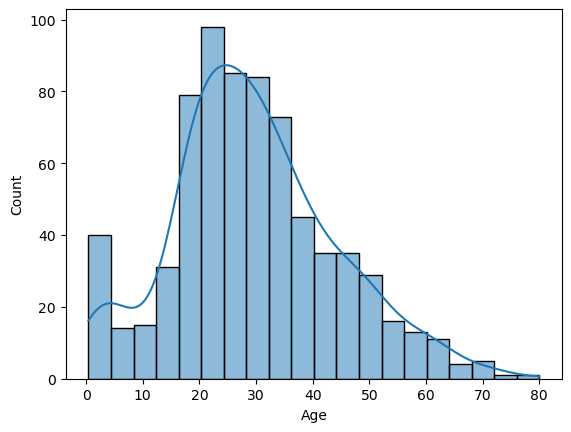

In [21]:
sns.histplot(data["Age"].dropna(), kde=True)

C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

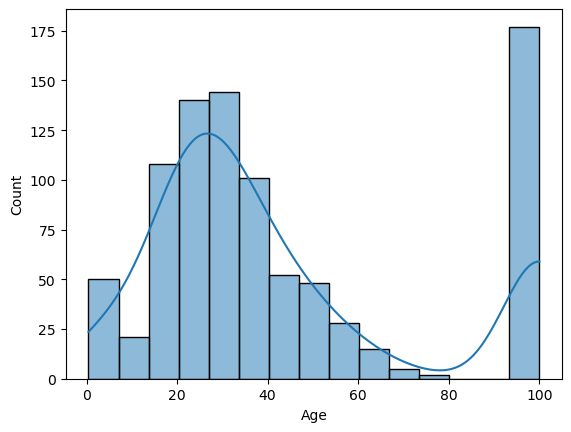

In [22]:
# Lets create outliers in Age column just to understand how to handle outliers.

sns.histplot(data["Age"].fillna(100), kde=True)

### If your data is following the normal distribution, we use following method to handle outliers. Above, before filling null values with 100, we could see that Age column was following the normal distribution. 

C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

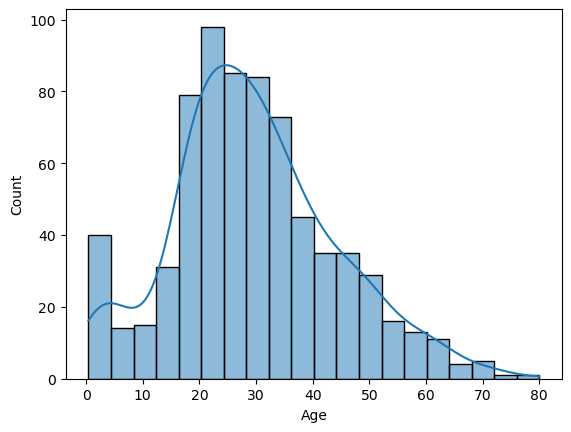

In [23]:
# Gaussian/ normal distributed data

sns.histplot(data["Age"], kde=True) # Here, Age is following the normal distribution.

<Axes: xlabel='Age'>

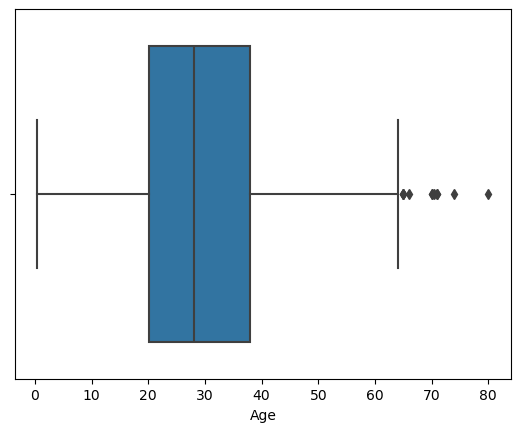

In [24]:
# Lets find outliers in your data

sns.boxplot(data=data, x=data["Age"])

In [25]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# Now, as we have assumed (can be seen from above diagram), that the Age is following normal distribution, we need to find the upper and lower boundry with the help of which we can find outliers.
# Why to find upper and lower boundry:

It is considered that the 99.75% if data is present in between the lower and upper boundry and data points outside of this boundry are considered as an outliers.

How do we find upper and lower boundry??

Upper boudry = mean + 3*standard deviation
Lower boudry = mean - 3*standard deviation

Once you get upper and lower boudry point, data points outside of this range would be considered as outliers.
Lets calculate this boudry points for Age column


In [26]:
Lower_boundry_age = data["Age"].mean() - 3* data["Age"].std()
Upper_boundry_age = data["Age"].mean() + 3* data["Age"].std()


In [27]:
print(Lower_boundry_age, Upper_boundry_age)

-13.880374349943303 73.27860964406094


#### Above, points outside of 73.27 would be comsidered as outliers. Here, we would not consider lower boundry point -13.88 as Age cannot be negative.

## So, this is how you are supposed to find outliers if your data is following the gaussian distribution.


### How to find outliers if data is right/left skewed.

#In this case, we should be finding upper_gate or lower_gate point. All the points outside of this range would be considered as outliers. To find this values,we need to calculate Inter Quantile Range.

Inter Quantile Range (IQR) = 75th quantile value - 25th quantile value

upper_gate = 75th quantile value + (IQR * 1.5 )
lower_gate = 25th quantile value - (IQR * 1.5 )

### Here, values outside of this range are considered as outliers 

### How to find extreme outliers
upper_gate = 75th quantile value + (IQR * 3 )
lower_gate = 25th quantile value - (IQR * 3 )

### Here, values outside of this range would be considered as extreme outliers.

### In skewed data we should always try to find extreme outliers and deal with them.



In [28]:
# In above dataset, "Fare" column is following skewed distribution. Lets find upper_gate and lower_gate value for this column

data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

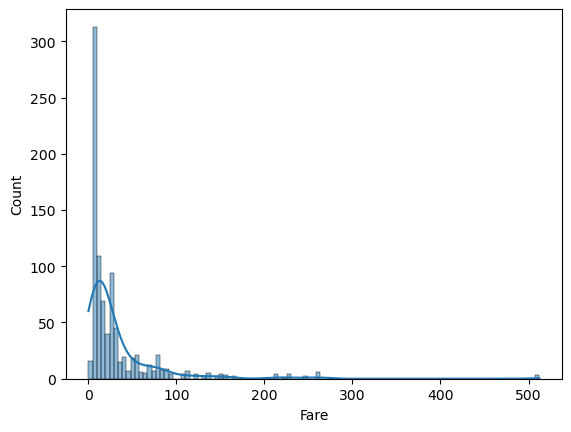

In [29]:
sns.histplot(data["Fare"], kde=True) # Here, we can see that data is right skewed.

<Axes: xlabel='Fare'>

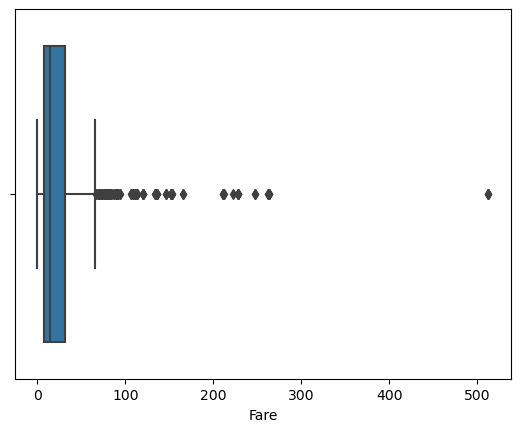

In [30]:
sns.boxplot(data=data, x="Fare")

In [31]:
IQR = data["Fare"].quantile(0.75) - data["Fare"].quantile(0.25)
IQR

23.0896

In [32]:
# Lets find upper gate and lower gate value.

upper_gate = data["Fare"].quantile(0.75) + (IQR * 1.5)
lower_gate = data["Fare"].quantile(0.25) - (IQR * 1.5)
print(upper_gate,lower_gate ) # Here, we can find outliers

65.6344 -26.724


In [33]:
# Lets find upper gate and lower gate value.

upper_gate = data["Fare"].quantile(0.75) + (IQR * 3)
lower_gate = data["Fare"].quantile(0.25) - (IQR * 3)
print(upper_gate,lower_gate ) # Here, we can find extreme outliers

100.2688 -61.358399999999996


#### Here, we can see that 100 is the upper boudry for FARE column, hence values above 100 would be considered as extreme outliers. We would not consider -61 (lower_gate) value as Fare cannot be negative.

#### In right or left skewed data, you should always find extreme outliers by finding upper and lower gate and try to deal with those outliers.

# Hence,
### In gaussian distributed/ normal distributed data, we should find outliers by finding upper_boundry and lower_boundry and try to deal with those outliers.

### In right or left skewed data, you should always find extreme outliers by finding upper and lower gate and try to deal with those outliers.

### How to handle this outliers now??

### Once you find the upper and lower gate/boundry, use those values to replace outliers. Lets see this in practical.

df=data.copy()


In [42]:
df=data.copy()


In [43]:
df.loc[data["Age"]>73, "Age"] = 73 # 73 is the upper_boudry for Age column.

In [44]:
df.loc[data["Fare"]>100, "Fare"] = 100 # 100 is the upper_gate for Fare column

<Axes: xlabel='Age'>

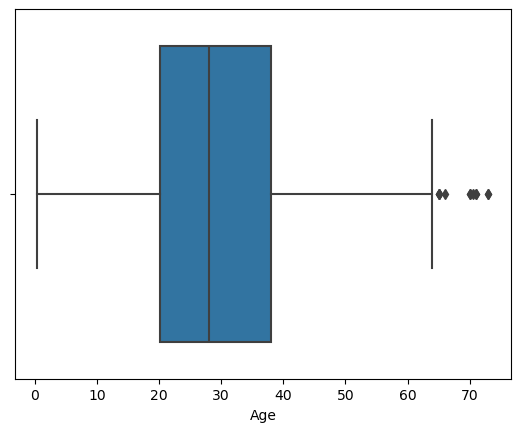

In [45]:
sns.boxplot(data=df, x="Age")

<Axes: xlabel='Fare'>

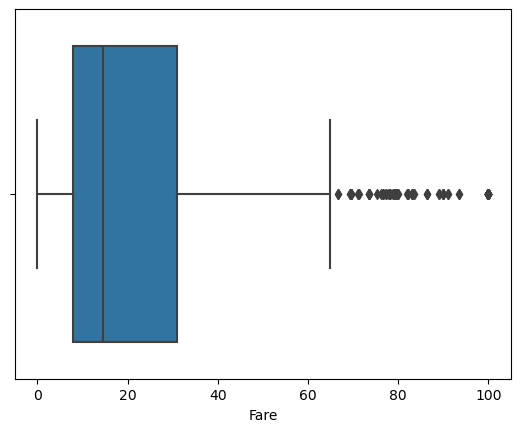

In [46]:
sns.boxplot(data=df, x="Fare")

C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

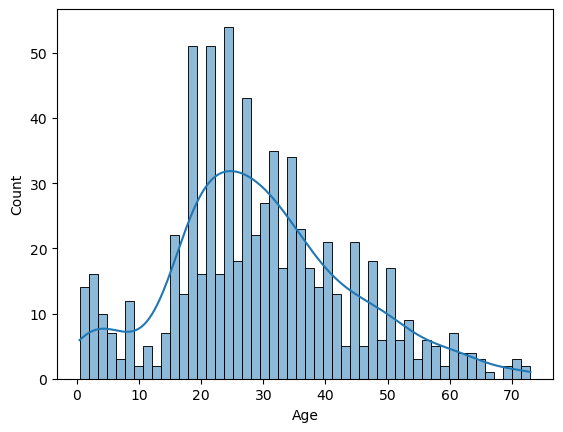

In [47]:
sns.histplot(df["Age"], kde=True, bins=50)

C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

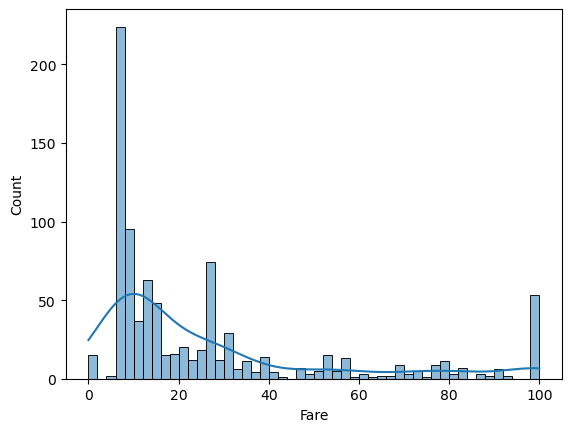

In [48]:
sns.histplot(df["Fare"], kde=True, bins=50)

Age     0
Fare    0
dtype: int64


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,Age,Fare
832,0.0,7.2292
462,47.0,38.5000
871,47.0,52.5542
384,0.0,7.8958
97,23.0,63.3583
...,...,...
886,27.0,13.0000
527,0.0,100.0000
181,0.0,15.0500
572,36.0,26.3875


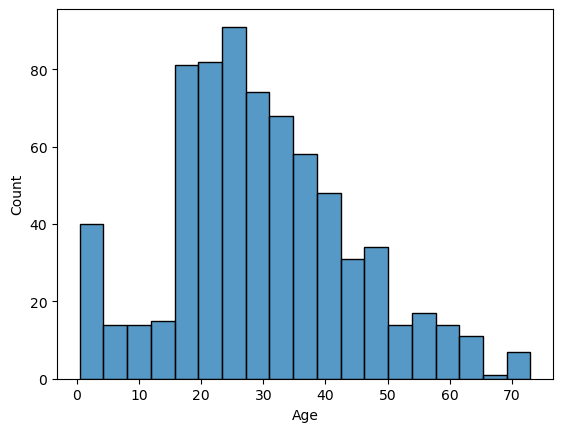

In [56]:
# lets try applying machine learning algorithms on the data once we have handled outliers.

# Lets divide data into indpendent and dependent sections

x = df[["Age", "Fare"]].fillna(0)
y = df["Survived"]

sns.histplot(data=df, x="Age")

print(x.isnull().sum())

# Lets split data into train test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

x_test

In [50]:
# lets try applying machine learning algorithms on the data once we have handled outliers.

# Lets try logistic regression

from sklearn.linear_model import LogisticRegression
logic_regression = LogisticRegression()
logic_regression.fit(x_train, y_train)
y_predict = logic_regression.predict(x_test)
y_predict_1 = logic_regression.predict_proba(x_test)

In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(y_test, y_predict)


0.6145251396648045

In [52]:
roc_auc_score(y_test, y_predict_1[:,1])

0.6325277849573533

In [53]:
# Lets try RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(x_train, y_train)
y_predict = randomforest_classifier.predict(x_test)
y_predict_1 = randomforest_classifier.predict_proba(x_test)

In [54]:
accuracy_score(y_test, y_predict)


0.659217877094972

In [55]:
roc_auc_score(y_test, y_predict_1[:,1])

0.6950116309123805